## Problem

"Predict behavior to retain customers.Analyze all relevant customer data and develop focused customer retention programs."

## Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges Demographic info about customers – gender, age range, and if they have partners and dependents

In [140]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Install libraries
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from joblib import dump, load

# Load the data
X_full = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col='customerID')

print('The table has ', X_full.shape[0], ' unique customers')
print('The table has ', X_full.shape[1], ' features')

# Allow us to see all columns of our dataframe
pd.set_option('max_columns', None)

The table has  7043  unique customers
The table has  20  features


In [141]:
X_full.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [142]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

It's clear that there exists class imbalance in our dataset because 26.5% of customers churned while 73.5% of customers stayed.

Since decision-tree based models are susceptible to frequency bias, we must address the class imbalance in one of two ways in order to make the distribution more equal:
1. Undersample the majority class (customer stayed)
2. Oversample the minority class (customer churned)

Since our dataset is relatively small at 7,043 rows, the better choice would be to pick option #2 and oversample the minority class.


In [143]:
# Check which datatypes are contained within 'TotalCharges'

X_full['TotalCharges'].apply(type).value_counts()

<class 'str'>    7043
Name: TotalCharges, dtype: int64

In [144]:
X_full['TotalCharges'] = pd.to_numeric(X_full['TotalCharges'], errors='coerce')
X_full['TotalCharges'].apply(type).value_counts()


<class 'float'>    7043
Name: TotalCharges, dtype: int64

In [145]:
X_full.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [146]:
X_full.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

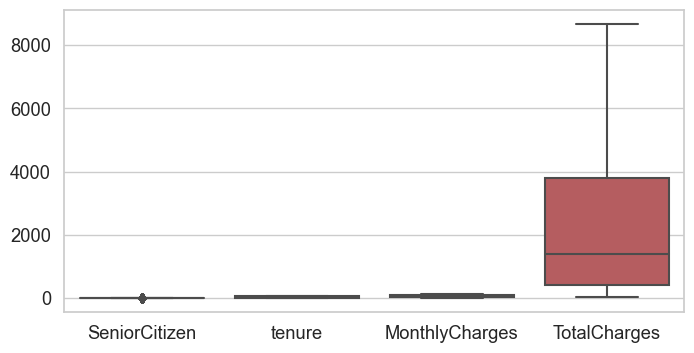

In [147]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data =X_full)
plt.show()

Customers who stayed:   5174
Customers who churned:   1869


Text(0, 0.5, 'Count')

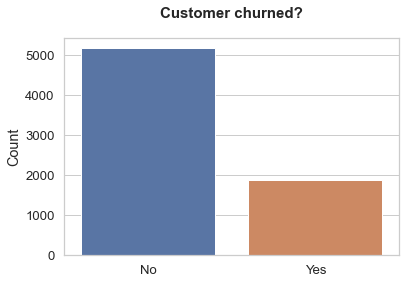

In [148]:
#EDA
# Take a look at how many customers churned and how many stayed
target_dist = X_full['Churn'].value_counts()
print('Customers who stayed:  ', target_dist[0])
print('Customers who churned:  ', target_dist[1])

# Visualize the customer churn distribution
sns.set_style('whitegrid')
sns.barplot(x=target_dist.index, y=target_dist.values)
plt.title('Customer churned?', pad=20, fontsize=15, fontweight='bold')
plt.ylabel('Count')

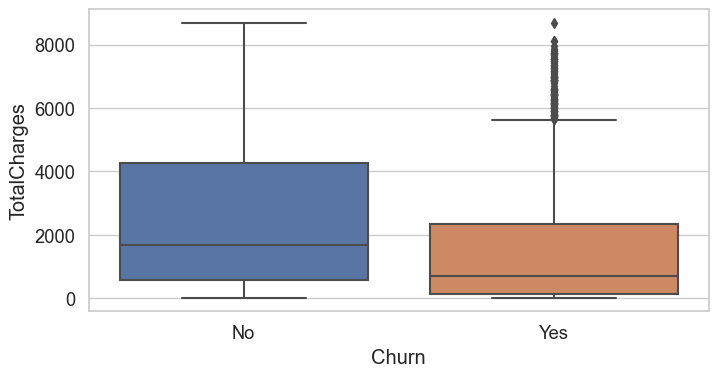

In [149]:
# The distrbution of TotalCharges between Churn categories with a Box Plot
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data =X_full, x = "Churn", y = "TotalCharges")
plt.show()

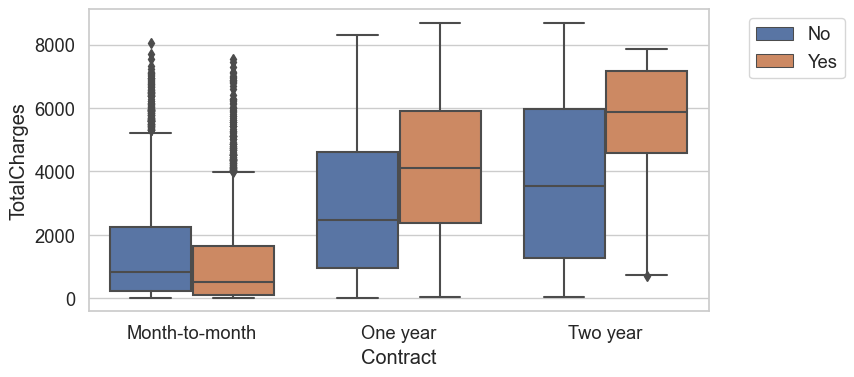

In [150]:
#The distribution of TotalCharges per Contract type
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data =X_full, x = "Contract", y = "TotalCharges", hue = "Churn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


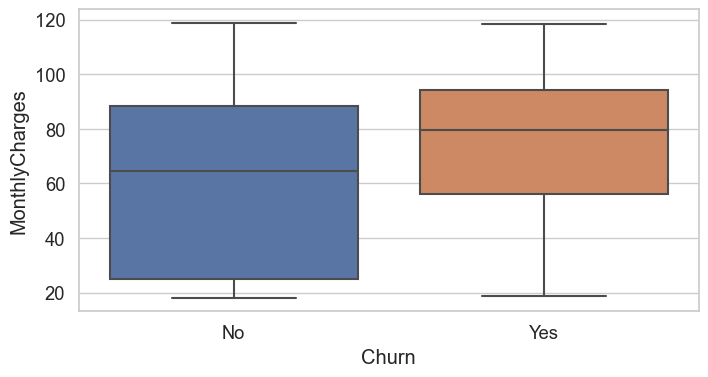

In [151]:
# The distrbution of MonthlyCharges between Churn categories with a Box Plot
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data =X_full, x = "Churn", y = "MonthlyCharges")
plt.show()

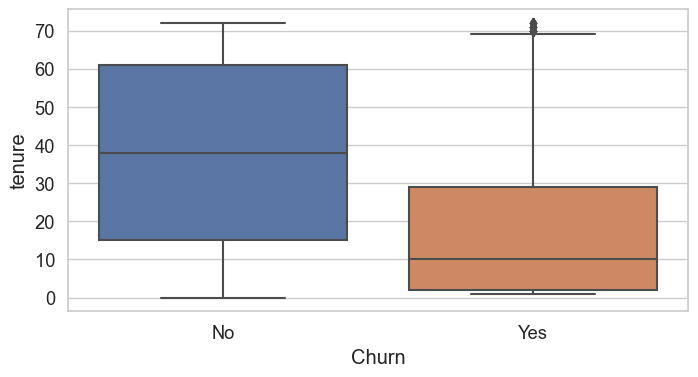

In [152]:
# The distrbution of tenure between Churn categories with a Box Plot
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data =X_full, x = "Churn", y = "tenure")
plt.show()

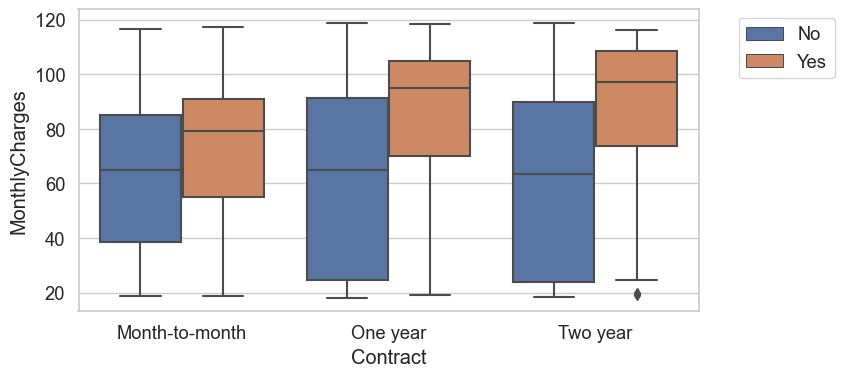

In [153]:
#The distribution of MonthlyCharges per Contract type
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data =X_full, x = "Contract", y = "MonthlyCharges", hue = "Churn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

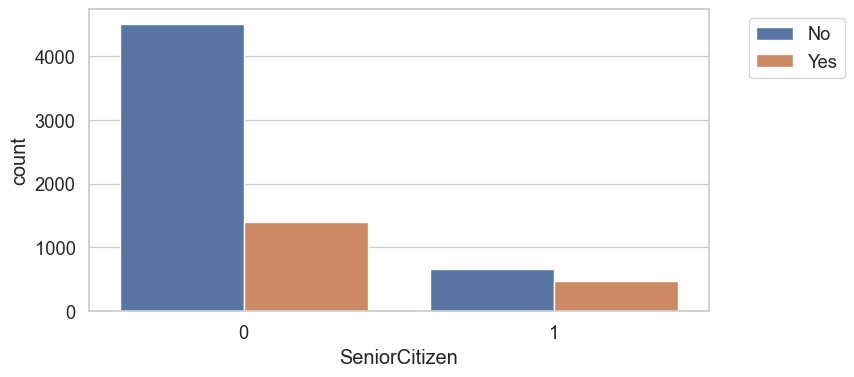

In [154]:
# The distrbution of SeniorCitizen between Churn categories with a Box Plot
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = X_full, x = "SeniorCitizen", hue = 'Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### <h3><center> Interesting Observations: </center></h3>
1. `SeniorCitizen` seems to be a categorical representation of whether or not a customer is a senior citizen (class=1) or not (class=0)
    - This column has already been numerically encoded, so there is nothing for us to do here when it comes time to feature engineering.
2. `tenure` is the number of months a customer has stayed at the company.  It looks like the company has some loyal customers!
    - Our intuition tells us that this could be a useful predictor of customer churn.  Loyal customers might be unlikely to churn. 
    - There don't seem to be any outliers here, so this isn't something we have to worry aobut.
3. `MonthlyCharges` is the total amount a customer pays per month.
    - There don't seem to be any outliers here, so this isn't something we have to worry aobut.
4. `TotalCharges` contains 11 NaN values.
    - We will have to handle this later on using imputation.

# Outliers

In [155]:
# Find the 25th and 75th percentile values of 'TotalCharge' for customers who churned
lower_percentile = X_full[X_full['Churn']=='Yes'].TotalCharges.quantile(.25)
upper_percentile = X_full[X_full['Churn']=='Yes'].TotalCharges.quantile(.75)

# Calculate the inter-quartile range
iqr = upper_percentile - lower_percentile

# Calculate the cut-off point after which a datapoint becomes an outlier
outlier_limit = upper_percentile + (1.5 * iqr)

# Dataframe consisting only rows of outlierly, abnormally high 'TotalCharge' customers who churned
outlier_tot_charge_churn = X_full[ (X_full['Churn']=='Yes') & (X_full['TotalCharges'] > outlier_limit) ]

# Interesting statistics of abnormally high 'TotalCharge' customers who churned
num_totCharge_outliers = len(outlier_tot_charge_churn.index)
avg_spent_outliers = outlier_tot_charge_churn.TotalCharges.mean()
tot_spent_outliers = num_totCharge_outliers * avg_spent_outliers

print('Number of outlierly customers:  ', num_totCharge_outliers)
print("Average total amount spent per outlierly customer:  ", avg_spent_outliers)
print('Total amount spent by outlierly customers:  ', tot_spent_outliers)


Number of outlierly customers:   109
Average total amount spent per outlierly customer:   6670.281192660553
Total amount spent by outlierly customers:   727060.6500000003


There are 109 such best-paying customers who ended up churning.  On average, each person spent \\$6,670 over their entire customer lifetime, and as a whole, the entire group of outliers ended up contributing approximately \\$727,060 to the company's bottom line. 

These individuals are our most valuable customers, and we would like to retain them as much as possible.  By being able to predict whether or not such customers are at risk of leaving, we will be better placed to offer these inviduals incentives to stay.

In [156]:
# Correlation matrix

<AxesSubplot:title={'center':'Correlation Matrix of Our Numerical Features'}>

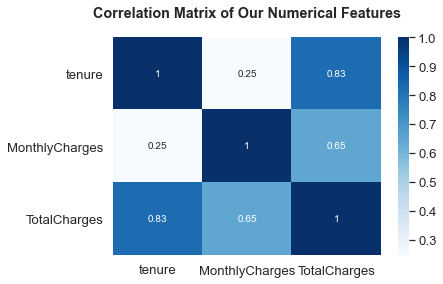

In [157]:
# Generate the correlation matrix of our numerical features
corrMatrix = X_full[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Visualize the correlation matrix
plt.title('Correlation Matrix of Our Numerical Features', pad=20, fontweight='bold')
sns.heatmap(corrMatrix, cmap='Blues', annot=True)

### Interesting Observations: 
1. There's a high correlation between `tenure` and `TotalCharges`
    - This fits our intuition that the longer a customer has been with the company, the more they will have paid.
    - Despite the high correlation between the two features, it is not enough to justify removing one of them because they are not excessively correlated.
2. There's a moderate correlation between `MonthlyCharges` and `TotalCharges`
    - It makes sense that the more you pay on a month-to-month basis, the more you will have spent overall.
    - The reason why `MonthlyCharges` is not as correlated to `TotalCharges` as `tenure` is likely due to the company being subscription based
3. There's a low correlation between `tenure` and `MonthlyCharges`

Given the fact that `TotalCharges` is more correlated to `tenure` than it is to `MonthlyCharges`, then this could inform the company business model.  In other words, it seems that the trope "slow and steady wins the race" holds true, as customer value is more determined by time spent with the company than by their monthly payments.  If this is indeed the case, then it would be interesting to see if high monthly payments lead to increased churn rates among customers.

Since we've completed our EDA of the numerical columns, let's turn our attention to our categorical data.

Text(0, 0.5, 'Count')

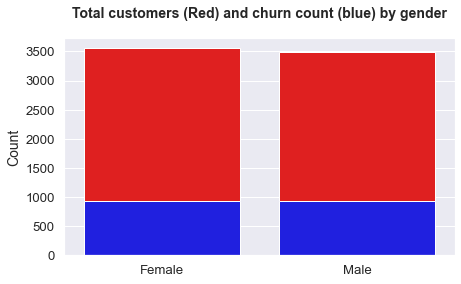

In [158]:
# Set the style of our visualizations
sns.set_style('whitegrid')
sns.set(font_scale = 1.2)
plt.figure(figsize=(7,4))

# Create the barplot (in blue) depicting customer count--by gender
gender_dist = X_full['gender'].value_counts()
sns.barplot(x=gender_dist.index, y=gender_dist.values, color='red')

# Create the barplot (in orange) depicting customer churn count--by gender
gender_churn_dist = X_full[X_full.Churn=='Yes']['gender'].value_counts()
sns.barplot(x=gender_churn_dist.index, y=gender_churn_dist.values, color='blue')

# Label the graph
plt.title('Total customers (Red) and churn count (blue) by gender', 
          pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14)

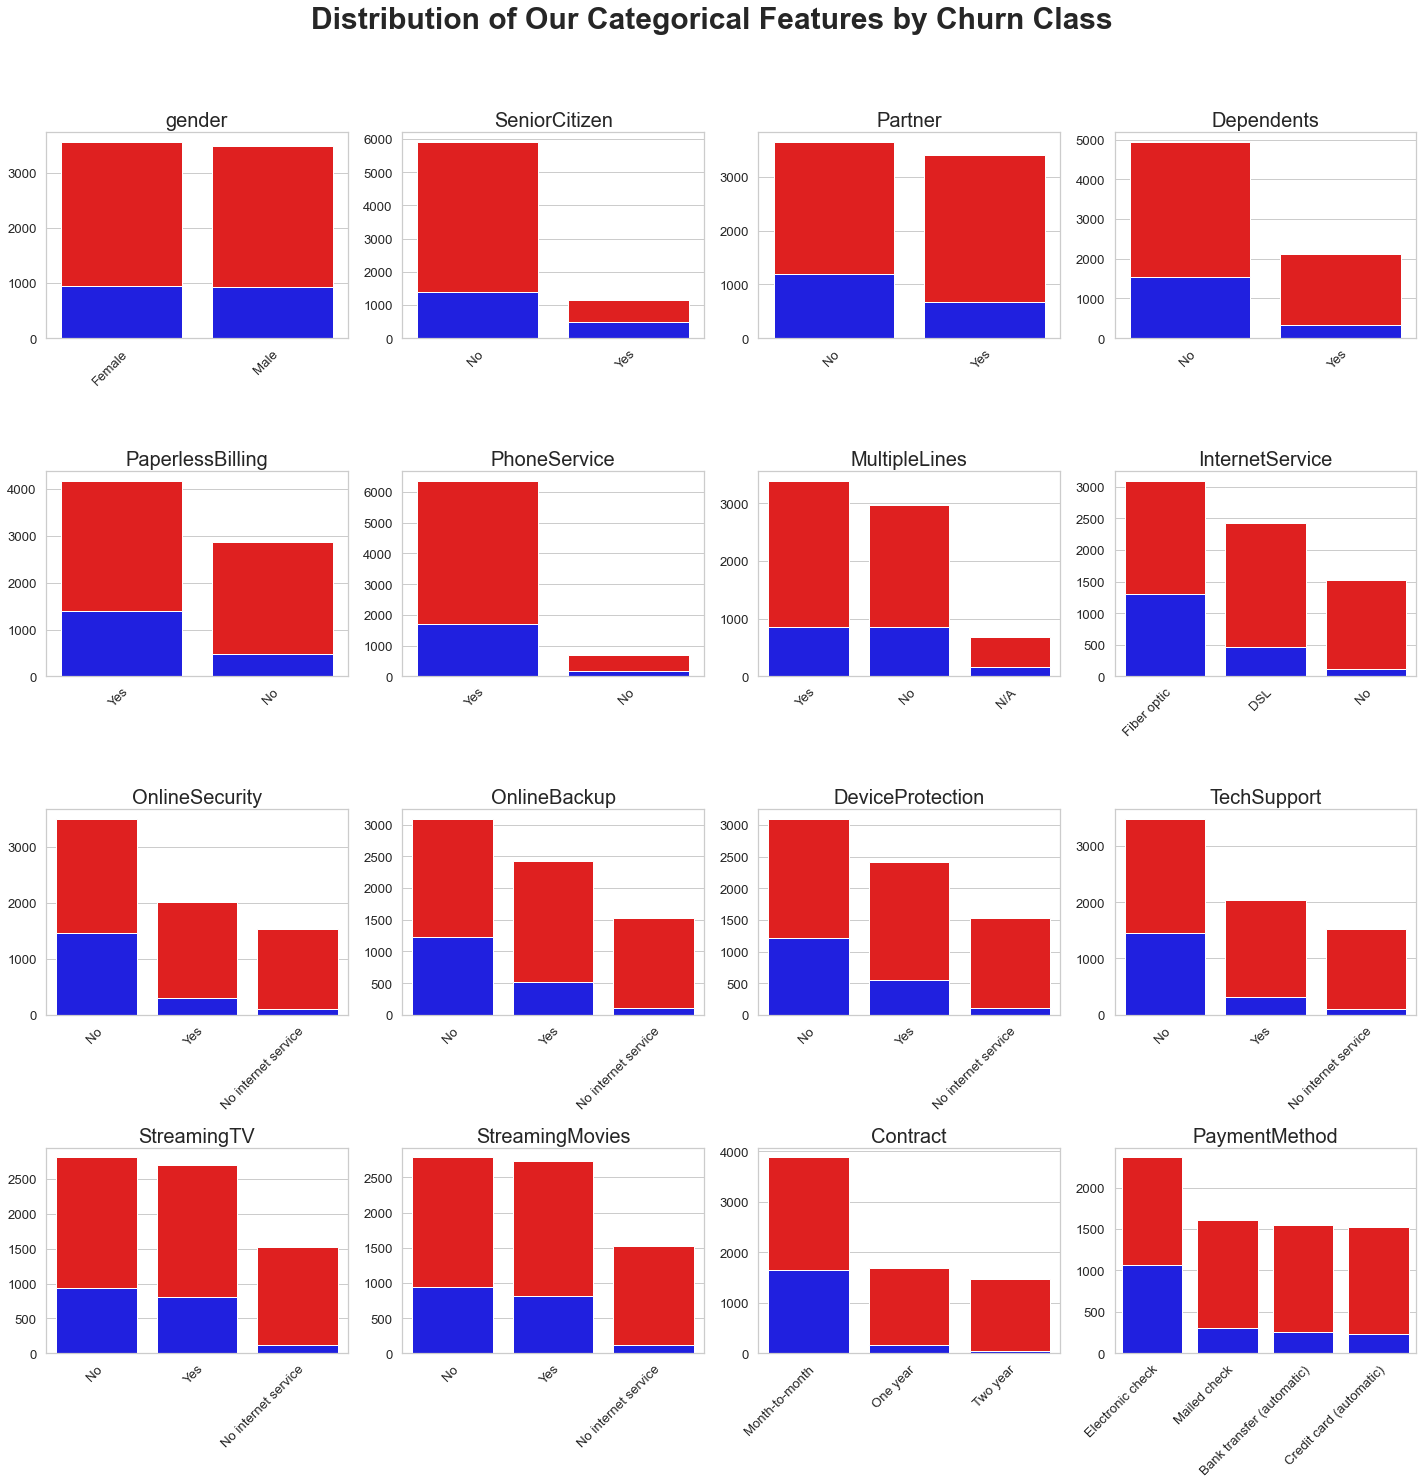

In [159]:
# Find and replace categorical values to make visualization more readable
X_full['SeniorCitizen'].astype('object')
X_full.replace(to_replace={'SeniorCitizen': {0:'No', 1:'Yes'}}, inplace=True)
X_full.replace(to_replace={'MultipleLines': {'No phone service':'N/A'}}, inplace=True)

# Get a list of attributes to visualize
cat_cols_viz = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                'PaperlessBilling', 'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


# Set style
sns.set_style('whitegrid')

# Set up subplot to display graphs
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20), sharex=False, sharey=False)
plt.suptitle('Distribution of Our Categorical Features by Churn Class', 
             fontsize=30, fontweight='bold', y=1.032)

# Initialize row and column index iterators in preparation for filling in the subplot
row_iterator = 0
col_iterator = 0

# Fill in the subplot
for col in cat_cols_viz:
    # Adjust indices once we reach the end of a row (moving from left to right)
    if col_iterator == 4:
        col_iterator = 0
        row_iterator = row_iterator + 1
    
    
    # Initialize value count series
    valCount_series = X_full[col].value_counts()
    churn_valCount_series = X_full[X_full.Churn=='Yes'][col].value_counts()
    
    
    # Create the barplot (in blue) depicting customer count--by column
    sns.barplot(x=valCount_series.index, y=valCount_series.values, color='Red', ax=axes[row_iterator][col_iterator])
    
    # Create the barplot (in orange) depicting customer churn count--by column
    sns.barplot(x=churn_valCount_series.index, y=churn_valCount_series.values, color='blue', ax=axes[row_iterator][col_iterator])

    # Label the graph
    axes[row_iterator][col_iterator].set_title('%s' % col, fontsize=20)
        
    # Rotate xlabels
    plt.sca(axes[row_iterator, col_iterator])
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')    
    
    # Increment row and column indices
    col_iterator = col_iterator + 1

    
# Adjust spacing of subplot
fig.tight_layout()

### Interesting Observations:
1. Seemingly important features:
    - `Contract`: the longer the contract, the less likely a customer is to churn.
    - `PaymentMethod`: customers paying via electronic check are more likely to churn. 
    - `OnlineSecurity`: customers with no online security are more likely to churn.
    - `TechSupport`: customers receiving no tech support are more likely to churn.
2. Seemingly unimportant features:
    - `PhoneService` and `MultipleLines`: both have similar distributions across their different categories.  
        - The distributions aren't as balanced as the one we see with `gender`, so while the two features may not contribute much to the model, it might be worth keeping them in the end. 

# DATA CLEANING
In general, the dataset is very clean because after checking these things, we found that:
1. Our target column is complete and doesn't contain any NaN
    - No rows need to be dropped for this reason
2. Most columns are complete and don't contain any NaN
    - No columns need to be dropped for this reason
3. Our features don't leak information from the future (after the customer churned)
    - No columns need to be dropped for this reason
4. No features are redundant or excessively correlated
    - No columns need to be dropped for this reason
5. Though there are outlierly customers in terms of `TotalCharge`, the payment totals are not outside the realm of possibility
    - No rows need to be dropped for this reason

Our dataset isn't perfect, however, so we had to do the following to clean our data:
1. Convert elements of `TotalCharges` from 'strings' to 'floats'
2. Find and replace empty strings in `TotalCharges` with NaN

Now what's left to do is:
1. Drop the `gender` column since it doesn't contribute to our model. 
2. Remove white space from our value classes to make things more uniform.
3. Make binary value classes more descriptive
    - This will be imporant when we begin combining features during feature engineering so that we know what represents what.
4. Remove any duplicate entries in our data set

In [160]:
# Drop the 'gender' column from our dataset since it doesn't contribute to our model
X = X_full.drop('gender', axis=1)

# Remove whitespace from value classes and replace with '_'
whitespace_cols = cat_cols_viz[7:]
X[whitespace_cols] = X[whitespace_cols].stack().str.replace(' ', '_').unstack()

# Make value classes more descriptive
X.replace(to_replace={'SeniorCitizen': {'No':'Not_SenCit', 'Yes':'SeniorCitizen'}}, inplace=True)
X.replace(to_replace={'Partner': {'No':'No_Partner', 'Yes':'Partner'}}, inplace=True)
X.replace(to_replace={'Dependents': {'No':'No_Dependents', 'Yes':'Dependents'}}, inplace=True)
X.replace(to_replace={'PaperlessBilling': {'No':'No_PaperlessBill', 'Yes':'PaperlessBill'}}, inplace=True)
X.replace(to_replace={'PhoneService': {'No':'No_PhoneService', 'Yes':'PhoneService'}}, inplace=True)
X.replace(to_replace={'MultipleLines': {'No':'No_MultiLines', 'Yes':'MultiLines', 'N/A': 'No_PhoneService'}}, inplace=True)
X.replace(to_replace={'InternetService': {'No':'No_internet_service'}}, inplace=True)
X.replace(to_replace={'OnlineSecurity': {'No':'No_OnlineSecurity', 'Yes':'OnlineSecurity'}}, inplace=True)
X.replace(to_replace={'OnlineBackup': {'No':'No_OnlineBackup', 'Yes':'OnlineBackup'}}, inplace=True)
X.replace(to_replace={'DeviceProtection': {'No':'No_DeviceProtection', 'Yes':'DeviceProtection'}}, inplace=True)
X.replace(to_replace={'TechSupport': {'No':'No_TechSupport', 'Yes':'TechSupport'}}, inplace=True)
X.replace(to_replace={'StreamingTV': {'No':'No_StreamingTV', 'Yes':'StreamingTV'}}, inplace=True)
X.replace(to_replace={'StreamingMovies': {'No':'No_StreamingMov', 'Yes':'StreamingMov'}}, inplace=True)

# Using 'customerID', check to see if there are any duplicate entries
print('Number of duplicate entries:  ', X.index.duplicated().sum())

Number of duplicate entries:   0


# Feature Engineering
n this section, we will:
1. Investigate and impute missing values found in `TotalCharges`
2. Generate novel features
3. Encode our categorical features
    - Map ordinal values to appropriate integers
    - One-hot encode nominal values

But before we do, let's separate the target from our predictors.

In [161]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = X['Churn']
X.drop('Churn', axis=1, inplace=True)
y.dtype

dtype('O')

### Impute missing values

Let's first start off by deciding how to impute missing values found in `TotalCharges`.  Though we *could* impute these values using either the mean or median of the training data (actually the median would be preferable since `TotalCharges` has a skewed distribution), we suspect that there might be some hidden meaning behind these NaN's which might be masked if we imputed in this manner.


Recall that these missing values were originally strings of empty text, which may suggest that the value for `TotalCharge` should have been 0.  However, if there are any entries where `TotalCharges` is 0, then this theory would likely be incorrect because strings representing zero total charge would then be represented as '0' instead of the empty string.

Let's test this theory out by checking whether there are any entries where `TotalCharges` is 0.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

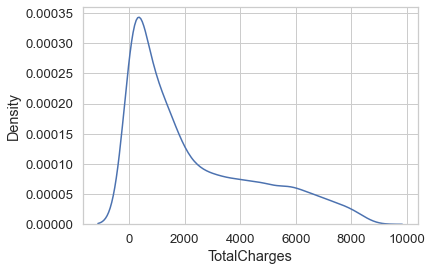

In [162]:
sns.kdeplot(X['TotalCharges'])

In [163]:
# Check how many 0's are found within 'TotalCharges'
totCharges_zeroes = X[X['TotalCharges'] == 0].shape[0]
print('There are  ', totCharges_zeroes, "  representations of '0' found within 'TotalCharges'")

There are   0   representations of '0' found within 'TotalCharges'


#Apparently there are zero representations of '0' found within `TotalCharges`.  Thus, it's beginning to look more and more likely that the empty string originally found within `TotalCharges` is intented to represent zero total charge.

To solidify our theory, let's look at `tenure` and `MonthlyCharges` to see if it makes sense that the empty string under `TotalCharges` does indeed represent 0.

In [164]:
# DataFrame of customers whose 'TotalCharges' was the empty string
totCharges_nan = X[X['TotalCharges'].isnull()]

# Find how many customers there are whose 'TotalCharges' was the empty string
print("There are ", totCharges_nan.shape[0], " customers whose 'TotalCharges' was the empty string")

# Get average 'tenure' of customers whose 'TotalCharges' was the empty string
print("The average TENURE of this subset is:  ", 
      totCharges_nan['tenure'].mean())

# Get average 'MonthlyCharges' for customers whose 'TotalCharges' was the empty string
print("The average MONTHLY CHARGE of this subset is:  ", 
      totCharges_nan['MonthlyCharges'].mean())

# Check if any customers whose 'TotalCharges' was the empty string had a monthly charge of 0
print('Did any such customers have a monthly charge of 0?    ', 0 in totCharges_nan['MonthlyCharges'].values)

There are  11  customers whose 'TotalCharges' was the empty string
The average TENURE of this subset is:   0.0
The average MONTHLY CHARGE of this subset is:   41.41818181818181
Did any such customers have a monthly charge of 0?     False


# <h3><center> Interesting Observations: </center></h3>
1. Individuals whose `TotalCharges` was the empty string are all brand new customers
2. All such customers have a non-zero value associated with `MonthlyCharges`


From everything we have just learned, I hypothesize that customers whose `TotalCharges` was the empty string are brand new customers who signed up for a monthly subscription but haven't yet made a payment.  Thus, the empty string for `TotalCharges` should really represent '0'.
    

Now that we know how to impute the NaN's in `TotalCharges`, let's find and replace NaN with 0.00.

In [165]:
# Find and replace NaN with 0 in 'TotalCharges'
X.fillna({'TotalCharges': 0}, inplace=True)

Since the NaN's in `TotalCharges` likely hold predictive power, we *could* add a missing value indicator (as a feature) in order to further highlight these missing values.  

However, we decided against doing this for the following reasons:
1. There are no other 0's in `TotalCharges` besides the ones we generated, so a value of 0 already stands out
2. Missing value indicator feature would be a sparse series of ~7,000 zeroes and 11 one's.  Overly complicating our model without providing much valuable information is not worth the tradeoff of efficiency and memory space.


But now that we finished imputing all values and we're just starting to think about generating new features, let's begin with some feature engineering!!

In [166]:
# Generate new features by combining existing ones
X['SenCit_Dependents'] = X['SeniorCitizen'] + '_' + X['Dependents']
X['Partner_Dependents'] = X['Partner'] + '_' + X['Dependents']
X['SenCit_Partner'] = X['SeniorCitizen'] + '_' + X['Partner']
X['SenCit_Contract'] = X['SeniorCitizen'] + '_' + X['Contract']
X['SenCit_TechSupport'] = X['SeniorCitizen'] + '_' + X['TechSupport']
X['SenCit_PayMeth'] = X['SeniorCitizen'] + '_' + X['PaymentMethod']

In [167]:
# Create column giving the average of 'TotalCharges' by contract length
temp1 = X.groupby('Contract')['TotalCharges'].agg(['mean']).rename({'mean':'Contract_mean_totCharges'},axis=1)
X = pd.merge(X, temp1, on='Contract', how='left')

# Create column giving the difference in 'TotalCharges' and the average of 'TotalCharges' by contract length
X['Contract_totCharges_diff'] = X['TotalCharges'] - X['Contract_mean_totCharges']


# Create column giving the average of 'MonthlyCharges' by payment method
temp2 = X.groupby('PaymentMethod')['MonthlyCharges'].agg(['mean']).rename({'mean':'PayMeth_mean_monthCharges'},axis=1)
X = pd.merge(X, temp2, on='PaymentMethod', how='left')

# Create column giving the difference in 'MonthlyCharges' and the average of 'MonthlyCharges' by payment method
X['PayMeth_monthCharges_diff'] = X['MonthlyCharges'] - X['PayMeth_mean_monthCharges']

In [168]:
# Round values to two decimal places
X = X.round(2)

In [169]:
### Ordinal Encoding

# Ordinal encoding of 'MultipleLines'
multiLines_dict = {'No_PhoneService':0, 'No_MultiLines':1, 'MultiLines':2}
X['MultipleLines_Ordinal'] = X['MultipleLines'].map(multiLines_dict)

# Ordinal encoding of 'InternetService'
intServ_dict = {'No_internet_service':0, 'DSL':1, 'Fiber_optic':2}
X['InternetService_Ordinal'] = X['InternetService'].map(intServ_dict)

# Ordinal encoding of 'Contract'
contract_dict = {'Month-to-month':0, 'One_year':1, 'Two_year':2}
X['Contract_Ordinal'] = X['Contract'].map(contract_dict)

# Drop unnecessary columns that have been encoded
ordinal_drop_cols = ['MultipleLines', 'InternetService', 'Contract']
X.drop(ordinal_drop_cols, axis=1, inplace=True)

In [170]:
### One-hot Encoding

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to the relevant columns
OH_col_names = ['SeniorCitizen', 'Partner', 'Dependents', 
           'PaperlessBilling', 'PhoneService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'PaymentMethod',
           'SenCit_Dependents', 'Partner_Dependents', 'SenCit_Partner',
           'SenCit_Contract', 'SenCit_TechSupport', 'SenCit_PayMeth']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[OH_col_names]))

# Replace default column names with more descriptive ones
OH_cols.columns = OH_encoder.get_feature_names(OH_col_names)

# One-hot encoding removed index; put it back
OH_cols.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
X.drop(OH_col_names, axis=1, inplace=True)

# Add one-hot encoded columns to numerical features
X = pd.concat([X, OH_cols], axis=1)


 #Oversample the Minority Class </center></h3>

Oversampling via **SMOTE** will help combat class imbalance and lead to more accurate predictions.

In [171]:
from imblearn.over_sampling import SMOTE

# Oversample our dataset using SMOTE to deal with class imbalance
oversample = SMOTE(sampling_strategy=0.5, random_state=42)
X, y = oversample.fit_resample(X, y)

# Perform Feature Scaling </center></h3>
Our goal is to test an entire suite of classification algorithms on our data in order to pick out the candidates that are best suited to the structure of our problem.  In order to make the comparison a fair one, we must scale our features because some of the algorithms to be tested (Logistic Regression, SVM, Linear Discriminant Analysis, and KNN) are based on the assumption that data is standardized and centered around 0.

In [172]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define the columns we wish to transform
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 
              'Contract_mean_totCharges', 'Contract_totCharges_diff', 
              'PayMeth_mean_monthCharges', 'PayMeth_monthCharges_diff',]

# Scale the relevant columns
transformer = ColumnTransformer([('scaler', StandardScaler(), scale_cols)], 
                                remainder='passthrough')
scaled_X = pd.DataFrame(transformer.fit_transform(X))

# Transformation removed column names; put them back
scaled_X.columns = X.columns


# Modelling

In [173]:
## Function to reduce the DF size
def df_mem_reducer(df):
    """
    Reduces the memory usage of a given dataframe via conversion of numeric attribute datatypes
    Input:
        - df: a Pandas dataframe
    Output: 
        - the same Pandas dataframe that uses less memory
    """
    
    # Original memory usage of dataframe in MB
    start_mem = df.memory_usage().sum() / 1024**2    
    
    # Conversion of numerical datatypes
    num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for col in df.columns:
        col_dtype = df[col].dtypes            
        if col_dtype in num_dtypes:
            col_min = df[col].min()
            col_max = df[col].max()
            if str(col_dtype)[:3] == 'int':
                if col_min > np.iinfo(np.int8).min and col_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif col_min > np.iinfo(np.int16).min and col_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif col_min > np.iinfo(np.int32).min and col_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else: 
                    df[col] = df[col].astype(np.int64)  
            else:
                if col_min > np.finfo(np.float16).min and col_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif col_min > np.finfo(np.float32).min and col_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    
    end_mem = df.memory_usage().sum() / 1024**2
    
    print('Original memory usage:  ', start_mem, '  MB')
    print('Final memory usage:  ', end_mem, '  MB')
    print('Memory of DataFrame reduced by:  ', ((start_mem - end_mem) / start_mem) * 100, '%')
        
    return df

In [174]:
# Reduce memory usage of scaled_X
scaled_X = df_mem_reducer(scaled_X)

Original memory usage:   4.3817901611328125   MB
Final memory usage:   1.0955390930175781   MB
Memory of DataFrame reduced by:   74.99791060888339 %


In [175]:
# Reduce memory usage of X
X = df_mem_reducer(X)

Original memory usage:   4.3817901611328125   MB
Final memory usage:   1.0659332275390625   MB
Memory of DataFrame reduced by:   75.67356746121567 %


In [176]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


# Import linear ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Import non-linear ML algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize our testing suite
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
results = []
model_names = []
all_models = []
all_models.append(('LR', LogisticRegression(max_iter=1000)))
all_models.append(('LDA', LinearDiscriminantAnalysis()))
all_models.append(('KNN', KNeighborsClassifier()))
all_models.append(('NB', GaussianNB()))
all_models.append(('SVM', SVC()))
all_models.append(('RF', RandomForestClassifier()))
all_models.append(('Ada', AdaBoostClassifier()))

# Run the tests
for name, model in all_models:
    scores = cross_val_score(model, scaled_X, y, cv=cv, scoring='roc_auc')
    results.append(scores)
    model_names.append(name)
    print(name, ':  ', 'Mean =  ', scores.mean(), '  ', 'STD =   ', scores.std())
    


LR :   Mean =   0.8550273450162443    STD =    0.008822184145644138
LDA :   Mean =   0.8478680266820878    STD =    0.008804206353572016
KNN :   Mean =   0.8107116704387749    STD =    0.010503008258757475
NB :   Mean =   0.8146715358630252    STD =    0.010246895429508922
SVM :   Mean =   0.8467818994794019    STD =    0.008485507763738732
RF :   Mean =   0.8628579451178896    STD =    0.008097885560963226
Ada :   Mean =   0.8780545411396474    STD =    0.008234539589940013


## Conclusion
As we can see, our **AdaBoost** model performed the best with Random Forrest,Logistic Regression, Linear Discriminant Analysis and Support Vector Machines not far behind.

# AdaBoost-AUC-0.878
# Random Forrest-AUC- 0.8629